In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
Excel_File = 'MA_Stock_Table.xlsx'

In [3]:
sheet=pd.read_excel(io=Excel_File)

In [4]:
#删除空白列
sheet.dropna(axis=1,how='any',inplace = True)

In [5]:
#替换AcgPro至TarCity列的'province','city'为空，并去除两端的空字符
for cl in ['AcgPro','ACGCity','TarPro','TarCity']:
    sheet[cl] = sheet[cl].str.replace('\(province\)|\(city\)','',case=False).str.strip()

<ipython-input-5-e2b9e3fee24c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  sheet[cl] = sheet[cl].str.replace('\(province\)|\(city\)','',case=False).str.strip()


In [6]:
#用 0 填充 NaN
sheet = sheet.fillna(0)

In [7]:
#城市与省份词云分析
from wordcloud import WordCloud

In [8]:
text_AcgCity = '' #存储AcgCity
text_AcgPro = '' #存储AcgProvince
text_TarCity= ''
text_TarPro= ''
list_argument = ['ACGCity','AcgPro','TarCity','TarPro']

def text_deal(text:str,argument:str):
    for i in range(len(sheet)):
            text += (str(sheet[argument][i])+ ' ')
    return text

text_AcgCity = text_deal(text_AcgCity,list_argument[0])
text_AcgPro = text_deal(text_AcgPro,list_argument[1])
text_TarCity = text_deal(text_TarCity,list_argument[2])
text_TarPro = text_deal(text_TarPro,list_argument[3])

In [9]:
def show_savefile(x,filepath=None):
    plt.axis('off')
    plt.imshow(x)
    if filepath != None:
        x.to_file(filepath)

In [10]:
Functionwc = lambda x :WordCloud(background_color='white',width=1500,height=1500,stopwords=['0']).generate(x)
WC_AcgCity = Functionwc(text_AcgCity)
WC_AcgPro = Functionwc(text_AcgPro)
WC_TarCity = Functionwc(text_TarCity)
WC_TarPro = Functionwc(text_TarPro)

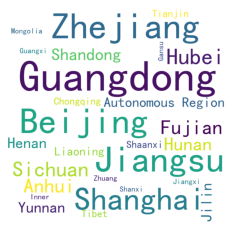

In [11]:
show_savefile(WC_AcgCity,'AcgCity.png')
show_savefile(WC_AcgPro,'AcgPro.png')
show_savefile(WC_TarCity,'TarCity.png')
show_savefile(WC_TarPro,'TarPro.png')

#导出词云分析图，如有需求则进行保存

In [13]:
sheet = sheet.set_index('Symbol')

In [14]:
sheet['ACGCity'].value_counts()

Beijing      34
Shenzhen     27
Shanghai     21
Hangzhou     13
Guangzhou    13
             ..
Yichun        1
Meizhou       1
Yancheng      1
Zhaotong      1
Beihai        1
Name: ACGCity, Length: 102, dtype: int64

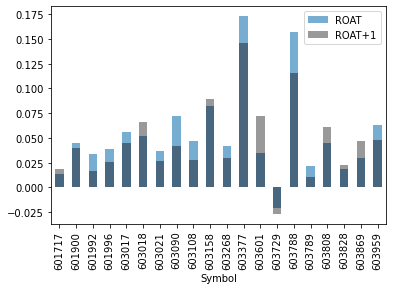

In [15]:
sheet['ROA'][-20:].plot.bar(alpha=0.6,label = 'ROAT')
sheet['ROAT+1'][-20:].plot.bar(color='k',alpha=0.4,label='ROAT+1')
plt.legend(loc='best')